In [4]:
# Loading all the library
import pandas as pd
import numpy as np
import os
import time

#General sci-Kit libraries for AI
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
from scipy.stats import norm
# import xgboost as xgb
# import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
# from lightgbm import LGBMClassifier

### Visualization libraries
import matplotlib.pyplot as pyplot
%matplotlib inline
import seaborn as sns
sns.set()

### Helper libraries
from GeneralHelper import *

# Ignoreing all the warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
bookings_df = pd.read_excel('bookings_dat_2017_2020.xlsx')
list = ['Unnamed: 0']
bookings_df = bookings_df.drop(list, axis = 1)
len(bookings_df)

89587

In [6]:
EDA_df = bookings_df
# 'WeekNumber','FinalDisposition','SecondConfirmDate','BookingConfirmationAge','ORDERID', 'OriginalOrderId'
list = ['WeekNumber','FinalDisposition']
EDA_df = EDA_df.drop(list, axis = 1)
EDA_df.columns

Index(['ORDERID', 'OriginalOrderId', 'Program', 'Participant', 'Promotion',
       'Campaign', 'RVOwner', 'AgentName', 'Resort', 'TourType', 'Wave',
       'isTour', 'SecondConfirmDate', 'BookingCreatedDate',
       'BookingScheduledDate', 'BookingAge', 'BookingConfirmationAge',
       'IsRescheduledBooking', 'ScheduledDayOfWeek'],
      dtype='object')

In [7]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89587 entries, 0 to 89586
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ORDERID                 89587 non-null  int64         
 1   OriginalOrderId         89587 non-null  int64         
 2   Program                 89390 non-null  object        
 3   Participant             89451 non-null  object        
 4   Promotion               67167 non-null  object        
 5   Campaign                86587 non-null  object        
 6   RVOwner                 82066 non-null  object        
 7   AgentName               86705 non-null  object        
 8   Resort                  89587 non-null  object        
 9   TourType                89587 non-null  object        
 10  Wave                    89587 non-null  int64         
 11  isTour                  89587 non-null  bool          
 12  SecondConfirmDate       83639 non-null  object

In [8]:
EDA_df.head()

,ORDERID,OriginalOrderId,Program,Participant,Promotion,Campaign,RVOwner,AgentName,Resort,TourType,Wave,isTour,SecondConfirmDate,BookingCreatedDate,BookingScheduledDate,BookingAge,BookingConfirmationAge,IsRescheduledBooking,ScheduledDayOfWeek
0,10249329,0,PRINT - DIRECT MAIL,VIN GAUGE - 102918 LSR RV,F150 / DINING / TT CRUISE,PRINT - DIRECT MAIL | VIN GAUGE - 102918 LSR R...,YES,ZACHARY HESS,LSR,daytour,2,True,2018-11-08,2018-11-08,2018-11-10,2,2.0,False,Saturday
1,10245156,0,VIC,FL-CAMPING WORLD-LAKE CITY,21 DAYS FREE CAMPING,VIC | FL-CAMPING WORLD-LAKE CITY | 21 DAYS FRE...,YES,PAUL EVERETT,LSR,daytour,2,True,2018-11-02,2018-10-22,2018-11-04,13,2.0,False,Sunday
2,10313001,0,BPO,BPO - FERRIS,NaN,BPO | BPO - Ferris | $1000 FREE CAMPING,NO,Jeremy Jone,TNC,daytour,3,False,NaN,2020-05-04,2020-05-04,0,NaN,False,Monday
3,10237336,0,WEB,LUNASANDSRESORT.COM,25K SWEEPS / $1000 FREE CAMPING / 5K SHOPPING ...,WEB | LUNASANDSRESORT.COM | 25K SWEEPS / $1000...,YES,KATLYN SCARBORO,LSR,campin,2,True,2018-10-07,2018-08-23,2018-10-10,48,3.0,False,Wednesday
4,10313018,0,WEB,MARKETING INFORMATICS,4 DAYS 3 NIGHTS FREE CAMPING,Web | Marketing Informatics | 4 Days 3 Nights ...,YES,MEGHAN THOMPSON,LSR,daytour,1,False,2020-05-04,2020-05-04,2020-05-07,3,3.0,False,Thursday


### Data Profiling and Understanding

In [8]:
EDA_df.columns

Index(['ORDERID', 'OriginalOrderId', 'Program', 'Participant', 'Promotion',
       'Campaign', 'RVOwner', 'AgentName', 'Resort', 'TourType', 'Wave',
       'isTour', 'SecondConfirmDate', 'BookingCreatedDate',
       'BookingScheduledDate', 'BookingAge', 'BookingConfirmationAge',
       'IsRescheduledBooking', 'ScheduledDayOfWeek'],
      dtype='object')

#### Profile of Catogorical Features

In [9]:
### Waves 

In [10]:
EDA_df.Wave.unique()

array([2, 3, 1, 4], dtype=int64)

In [11]:
EDA_df.Wave.value_counts()

2    36587
1    30967
3    21885
4      148
Name: Wave, dtype: int64

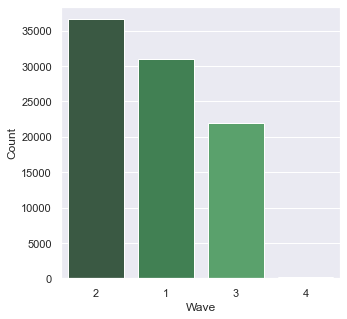

In [11]:
pyplot.figure(figsize=(5, 5))
ax = sns.countplot(data=EDA_df,
                   x='Wave',
                   order = EDA_df['Wave'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Wave', ylabel='Count')
pyplot.show()

In [13]:
### RVOwner

In [12]:
EDA_df.RVOwner.unique()

array(['YES', 'NO', nan, 'UNK', 'RV', 'FAL', '4601', 'TRU', '9803', 'No',
       'Yes', 'NO ', 'LOD', '2958', '7158', '7741', '8225', '8332',
       '8294', '1050', '4387', '9151', '107', '1517', '8990', '1159',
       '7596', '9630', '4523', '8119', '2155', '8913', '9798', '8153',
       '9566', '7201', '2804', '9782', '3220', '9704'], dtype=object)

In [13]:
### Tourtype

In [14]:
EDA_df.TourType.unique()

array(['daytour', 'campin'], dtype=object)

In [15]:
EDA_df.TourType.value_counts()

daytour    76173
campin     13414
Name: TourType, dtype: int64

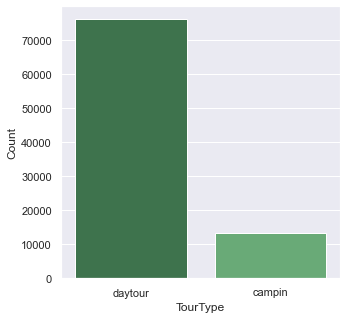

In [16]:
pyplot.figure(figsize=(5, 5))
ax = sns.countplot(data=EDA_df,
                   x='TourType',
                   order = EDA_df['TourType'].value_counts().index, palette="Greens_d")
ax.set(xlabel='TourType', ylabel='Count')
pyplot.show()

In [19]:
# Resort

In [20]:
EDA_df.Resort.unique()

array(['LSR', 'TNC', 'NSL', 'TRG', 'TRO', 'RFR', 'BLR'], dtype=object)

In [21]:
EDA_df.Resort.value_counts()

TNC    17466
TRG    17172
RFR    15843
NSL    14556
BLR    12512
LSR     8004
TRO     4034
Name: Resort, dtype: int64

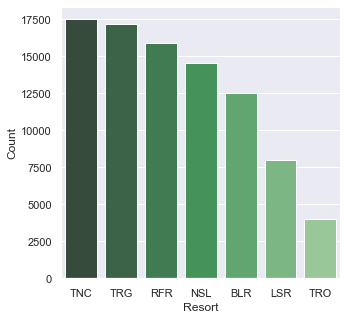

In [22]:
pyplot.figure(figsize=(5, 5))
ax = sns.countplot(data=EDA_df,
                   x='Resort',
                   order = EDA_df['Resort'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [23]:
## Scheduled Day Of Week

In [24]:
EDA_df.ScheduledDayOfWeek.unique()

array(['Saturday', 'Sunday', 'Monday', 'Wednesday', 'Thursday', 'Tuesday',
       'Friday'], dtype=object)

In [25]:
EDA_df.ScheduledDayOfWeek.value_counts()

Saturday     31523
Sunday       24198
Friday       14560
Thursday     11160
Monday        7411
Wednesday      502
Tuesday        233
Name: ScheduledDayOfWeek, dtype: int64

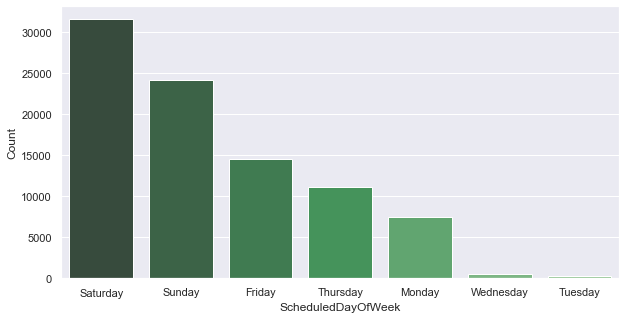

In [26]:
pyplot.figure(figsize=(10, 5))
ax = sns.countplot(data=EDA_df,
                   x='ScheduledDayOfWeek',
                   order = EDA_df['ScheduledDayOfWeek'].value_counts().index, palette="Greens_d")
ax.set(xlabel='ScheduledDayOfWeek', ylabel='Count')
pyplot.show()

#### Profile of Numerical Features

In [27]:
### Booking Age

In [28]:
EDA_df.BookingAge.describe()

count    89587.000000
mean        11.876399
std         16.098159
min       -381.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        371.000000
Name: BookingAge, dtype: float64

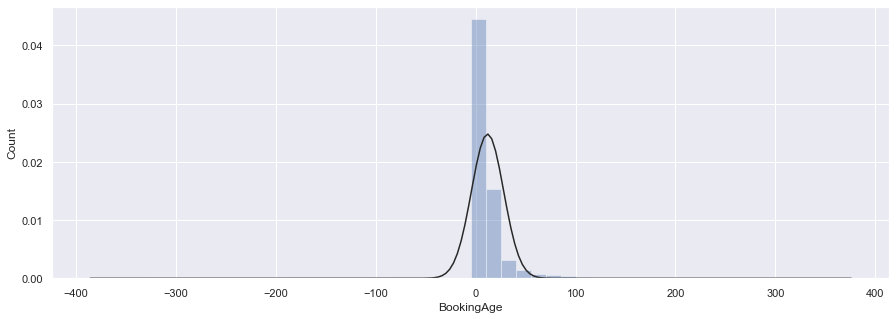

In [29]:
pyplot.figure(figsize=(15, 5))
ax = sns.distplot(EDA_df['BookingAge'], fit=norm, kde=False)
ax.set(xlabel='BookingAge', ylabel='Count')
pyplot.show()

In [30]:
## Booking Confirmation Age

In [31]:
EDA_df.BookingConfirmationAge.describe()

count    83639.000000
mean         2.641363
std          4.678860
min       -364.000000
25%          2.000000
50%          3.000000
75%          3.000000
max        371.000000
Name: BookingConfirmationAge, dtype: float64

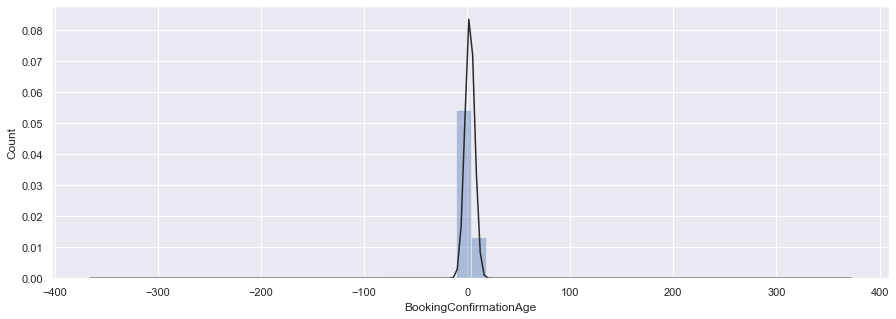

In [32]:
pyplot.figure(figsize=(15, 5))
ax = sns.distplot(EDA_df['BookingConfirmationAge'], fit=norm, kde=False)
ax.set(xlabel='BookingConfirmationAge', ylabel='Count')
pyplot.show()

### Features Transformation

In [33]:
### RVOwner Transformation

In [17]:
EDA_df.RVOwner = EDA_df.RVOwner.fillna('')
EDA_df.RVOwner = EDA_df.RVOwner.apply(lambda x: rv_data_sanitizar(x))

In [18]:
EDA_df.RVOwner.value_counts()

No     48713
Yes    40874
Name: RVOwner, dtype: int64

#### Features Outlier Handling

In [36]:
# Waves

In [19]:
EDA_df.loc[EDA_df.Wave > 3, 'Wave'] = 3

In [20]:
EDA_df.Wave.value_counts()

2    36587
1    30967
3    22033
Name: Wave, dtype: int64

In [21]:
# BookingAge

In [22]:
EDA_df.loc[(EDA_df.BookingAge > 12) | 
           (EDA_df.BookingAge < 0), 'BookingAge'] = EDA_df.BookingAge.mean()

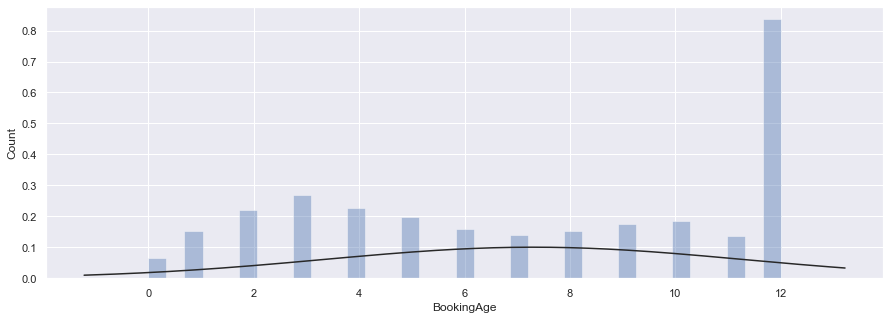

In [23]:
pyplot.figure(figsize=(15, 5))
ax = sns.distplot(EDA_df['BookingAge'], fit=norm, kde=False)
ax.set(xlabel='BookingAge', ylabel='Count')
pyplot.show()

In [24]:
### Booking Confirmation Age

In [25]:
EDA_df.loc[(EDA_df.BookingConfirmationAge > 10) | 
           (EDA_df.BookingConfirmationAge < 0), 'BookingConfirmationAge'] = EDA_df.BookingConfirmationAge.mean()

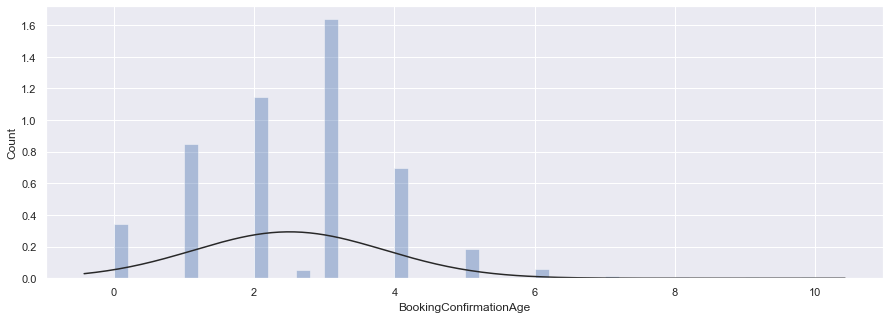

In [26]:
pyplot.figure(figsize=(15, 5))
ax = sns.distplot(EDA_df['BookingConfirmationAge'], fit=norm, kde=False)
ax.set(xlabel='BookingConfirmationAge', ylabel='Count')
pyplot.show()

#### Features Encoding

In [27]:
le = LabelEncoder()
ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

In [28]:
### Encoding for Target

In [29]:
EDA_df['Target'] = le.fit_transform(EDA_df.isTour)
EDA_df = EDA_df.drop(['isTour'], axis=1)

In [30]:
EDA_df.Target.value_counts()

0    51053
1    38534
Name: Target, dtype: int64

In [31]:
# Resort

In [32]:
EDA_df['Encoded_Resort'] = le.fit_transform(EDA_df.Resort)
Resorts_dummies = pd.get_dummies(EDA_df.Resort)
EDA_df = pd.concat([EDA_df, Resorts_dummies], axis=1, sort=False)

In [33]:
EDA_df.Resort.value_counts()

TNC    17466
TRG    17172
RFR    15843
NSL    14556
BLR    12512
LSR     8004
TRO     4034
Name: Resort, dtype: int64

In [34]:
EDA_df.loc[:,['Resort','Encoded_Resort','BLR','LSR','NSL','RFR','TNC','TRG','TRO']]

,Resort,Encoded_Resort,BLR,LSR,NSL,RFR,TNC,TRG,TRO
0,LSR,1,0,1,0,0,0,0,0
1,LSR,1,0,1,0,0,0,0,0
2,TNC,4,0,0,0,0,1,0,0
3,LSR,1,0,1,0,0,0,0,0
4,LSR,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
89582,LSR,1,0,1,0,0,0,0,0
89583,RFR,3,0,0,0,1,0,0,0
89584,TNC,4,0,0,0,0,1,0,0
89585,LSR,1,0,1,0,0,0,0,0


In [35]:
### RVOwner

In [36]:
EDA_df['is_RVOwner'] = le.fit_transform(EDA_df.RVOwner)
EDA_df = EDA_df.drop(['RVOwner'], axis=1)
EDA_df['is_RVOwner'].unique()

array([1, 0])

In [37]:
# bookings_df.TourType
EDA_df['Encoded_TourType'] = le.fit_transform(EDA_df.TourType)
tourtype = pd.get_dummies(EDA_df.TourType)
EDA_df = pd.concat([EDA_df, tourtype], axis=1, sort=False)
EDA_df.loc[:,['TourType','Encoded_TourType','campin', 'daytour']]

,TourType,Encoded_TourType,campin,daytour
0,daytour,1,0,1
1,daytour,1,0,1
2,daytour,1,0,1
3,campin,0,1,0
4,daytour,1,0,1
...,...,...,...,...
89582,daytour,1,0,1
89583,daytour,1,0,1
89584,campin,0,1,0
89585,daytour,1,0,1


In [38]:
EDA_df['Encoded_ScheduledDayOfWeek'] = le.fit_transform(EDA_df.ScheduledDayOfWeek)
SchDayOfWeek = pd.get_dummies(EDA_df.ScheduledDayOfWeek)
EDA_df = pd.concat([EDA_df, SchDayOfWeek], axis=1, sort=False)
EDA_df.loc[:,['ScheduledDayOfWeek','Encoded_ScheduledDayOfWeek','Friday','Monday','Saturday',
              'Sunday','Thursday','Tuesday','Wednesday']]

,ScheduledDayOfWeek,Encoded_ScheduledDayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Saturday,2,0,0,1,0,0,0,0
1,Sunday,3,0,0,0,1,0,0,0
2,Monday,1,0,1,0,0,0,0,0
3,Wednesday,6,0,0,0,0,0,0,1
4,Thursday,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
89582,Thursday,4,0,0,0,0,1,0,0
89583,Monday,1,0,1,0,0,0,0,0
89584,Saturday,2,0,0,1,0,0,0,0
89585,Saturday,2,0,0,1,0,0,0,0


In [39]:
EDA_df['Encoded_IsRescheduledBooking'] = le.fit_transform(EDA_df.IsRescheduledBooking)
EDA_df = EDA_df.drop(['IsRescheduledBooking'], axis=1)
EDA_df['Encoded_IsRescheduledBooking'].unique()

array([0, 1], dtype=int64)

In [40]:
EDA_df.Program = EDA_df.Program.fillna('')
EDA_df.Participant = EDA_df.Participant.fillna('')
EDA_df.Promotion = EDA_df.Promotion.fillna('')
EDA_df.Campaign = EDA_df.Campaign.fillna('')

In [41]:
EDA_df['Encoded_Campaign'] = le.fit_transform(EDA_df.Campaign)
EDA_df = EDA_df.loc[EDA_df.Campaign != '']
EDA_df.loc[:,['Encoded_Campaign','Campaign']]

,Encoded_Campaign,Campaign
0,3584,PRINT - DIRECT MAIL | VIN GAUGE - 102918 LSR R...
1,5739,VIC | FL-CAMPING WORLD-LAKE CITY | 21 DAYS FRE...
2,128,BPO | BPO - Ferris | $1000 FREE CAMPING
3,7501,WEB | LUNASANDSRESORT.COM | 25K SWEEPS / $1000...
4,7609,Web | Marketing Informatics | 4 Days 3 Nights ...
...,...,...
89582,31,Affiliate | Good Sam | 4 Days 3 Nights Camping
89583,40,Affiliate | Marketing Informatics | 4 Days 3 N...
89584,4981,RV SHOW | NC - Charlotte RV Show NCRVDA - N3 |...
89585,31,Affiliate | Good Sam | 4 Days 3 Nights Camping


## Features Engineering

The process of selecting and creating features from raw data.

1. Feature Selection
2. Feature Extraction

##### 1. Feature Selection
Choose efficient features and leave less informative & useless features.

##### 2. Feature Extraction 
This is a process to generating less number of new more informative features from existing features and This process is also known as Dimensionality Reduction.

In [44]:
EDA_df['B_S_week_of_the_year'] = EDA_df['BookingScheduledDate'].dt.week
EDA_df['B_S_day_of_the_month'] = EDA_df['BookingScheduledDate'].dt.day

In [45]:
EDA_df.B_S_day_of_the_month.describe()

count    86587.000000
mean        15.620001
std          8.754189
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: B_S_day_of_the_month, dtype: float64

In [46]:
EDA_df.B_S_week_of_the_year.describe()

count    86587.000000
mean        26.329692
std         13.259637
min          1.000000
25%         16.000000
50%         27.000000
75%         37.000000
max         52.000000
Name: B_S_week_of_the_year, dtype: float64

In [47]:
EDA_df.columns

Index(['ORDERID', 'OriginalOrderId', 'Program', 'Participant', 'Promotion',
       'Campaign', 'AgentName', 'Resort', 'TourType', 'Wave',
       'SecondConfirmDate', 'BookingCreatedDate', 'BookingScheduledDate',
       'BookingAge', 'BookingConfirmationAge', 'ScheduledDayOfWeek', 'Target',
       'Encoded_Resort', 'BLR', 'LSR', 'NSL', 'RFR', 'TNC', 'TRG', 'TRO',
       'is_RVOwner', 'Encoded_TourType', 'campin', 'daytour',
       'Encoded_ScheduledDayOfWeek', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Encoded_IsRescheduledBooking',
       'Encoded_Campaign', 'B_S_week_of_the_year', 'B_S_day_of_the_month'],
      dtype='object')

In [48]:
EDA_df.BookingCreatedDate

0       2018-11-08
1       2018-10-22
2       2020-05-04
3       2018-08-23
4       2020-05-04
           ...    
89582   2020-10-07
89583   2020-09-25
89584   2020-07-29
89585   2020-09-22
89586   2020-10-06
Name: BookingCreatedDate, Length: 86587, dtype: datetime64[ns]

In [49]:
EDA_df['B_C_day_of_the_week'] = EDA_df['BookingCreatedDate'].dt.day_name()

###  Exploratory Data Analysis

In [50]:
EDA_df.Target.value_counts()

0    48094
1    38493
Name: Target, dtype: int64

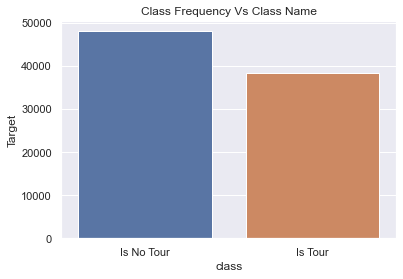

In [51]:
class_dist_df = pd.DataFrame(EDA_df['Target'].value_counts()).reset_index(drop=True)# Reseting the index and get the counts for each class 
class_dist_df['class']= ["Is No Tour","Is Tour"] # HD Means Heart diseases and WHD means NO diseases
sns.barplot(y = 'Target', x = class_dist_df['class'], data=class_dist_df) # Plotting Class frequency vs Class
pyplot.title('Class Frequency Vs Class Name')
pyplot.show()

![](http://) target variable is not imbalance so no need of under_sampling or over_sampling

In [52]:
### RVOwner

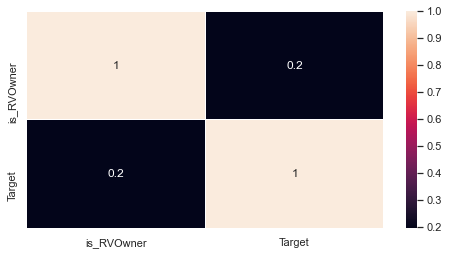

In [53]:
cor_mat = EDA_df.loc[:,['is_RVOwner','Target']].corr()
f, ax = pyplot.subplots(figsize=(8,4))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

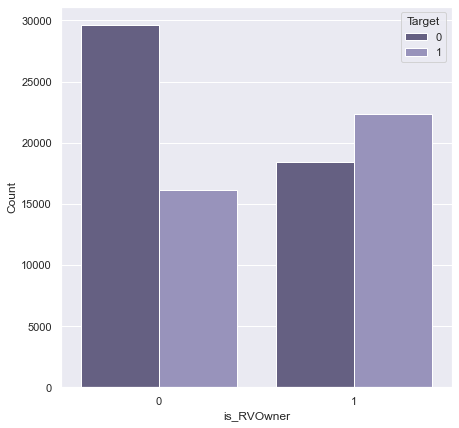

In [54]:
pyplot.figure(figsize=(7, 7))
ax = sns.countplot(data=EDA_df,
                   x='is_RVOwner',
                   order = EDA_df['is_RVOwner'].value_counts().index ,hue="Target", palette="Purples_d")
ax.set(xlabel='is_RVOwner', ylabel='Count')
pyplot.show()

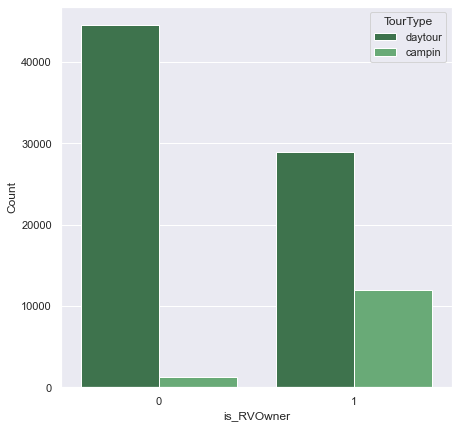

In [71]:
pyplot.figure(figsize=(7, 7))
ax = sns.countplot(data=EDA_df,
                   x='is_RVOwner',
                   order = EDA_df['is_RVOwner'].value_counts().index ,hue="TourType", palette="Greens_d")
ax.set(xlabel='is_RVOwner', ylabel='Count')
pyplot.show()

In [72]:
### Resorts

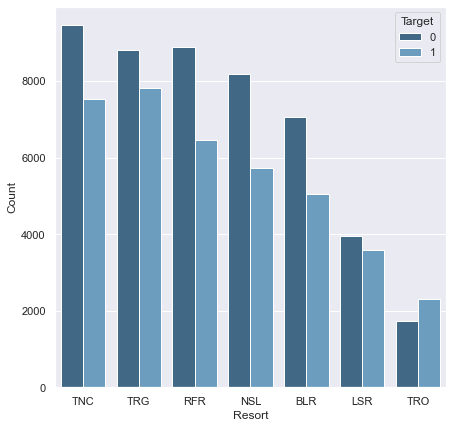

In [73]:
pyplot.figure(figsize=(7, 7))
ax = sns.countplot(data=EDA_df,
                   x='Resort',
                   order = EDA_df['Resort'].value_counts().index ,hue="Target", palette="Blues_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [74]:
print('Hits by Resorts')
print(EDA_df.Resort.value_counts())
print('')
print('Tours by Resorts')
print(EDA_df.loc[EDA_df.Target == 1].Resort.value_counts())
print('')
print('No_Tours by Resorts')
print(EDA_df.loc[EDA_df.Target == 0].Resort.value_counts())

Hits by Resorts
TNC    16988
TRG    16639
RFR    15352
NSL    13930
BLR    12115
LSR     7537
TRO     4026
Name: Resort, dtype: int64

Tours by Resorts
TRG    7816
TNC    7521
RFR    6466
NSL    5733
BLR    5059
LSR    3592
TRO    2306
Name: Resort, dtype: int64

No_Tours by Resorts
TNC    9467
RFR    8886
TRG    8823
NSL    8197
BLR    7056
LSR    3945
TRO    1720
Name: Resort, dtype: int64


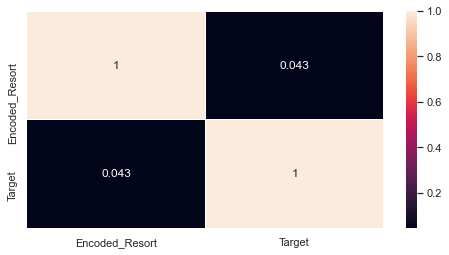

In [75]:
cor_mat = EDA_df.loc[:,['Encoded_Resort','Target']].corr()
f, ax = pyplot.subplots(figsize=(8,4))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

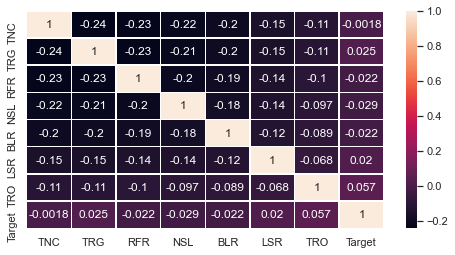

In [76]:
cor_mat = EDA_df.loc[:,['TNC','TRG','RFR','NSL','BLR','LSR','TRO','Target']].corr()
f, ax = pyplot.subplots(figsize=(8,4))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

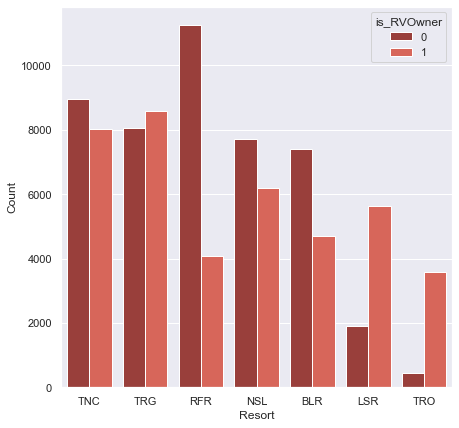

In [77]:
pyplot.figure(figsize=(7, 7))
ax = sns.countplot(data=EDA_df,
                   x='Resort',
                   order = EDA_df['Resort'].value_counts().index ,hue="is_RVOwner", palette="Reds_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [78]:
### Exploring the weeks

In [79]:
EDA_df.columns

Index(['ORDERID', 'OriginalOrderId', 'Program', 'Participant', 'Promotion',
       'Campaign', 'AgentName', 'Resort', 'TourType', 'Wave',
       'SecondConfirmDate', 'BookingCreatedDate', 'BookingScheduledDate',
       'BookingAge', 'BookingConfirmationAge', 'ScheduledDayOfWeek', 'Target',
       'Encoded_Resort', 'BLR', 'LSR', 'NSL', 'RFR', 'TNC', 'TRG', 'TRO',
       'is_RVOwner', 'Encoded_TourType', 'campin', 'daytour',
       'Encoded_ScheduledDayOfWeek', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Encoded_IsRescheduledBooking',
       'Encoded_Campaign', 'B_S_week_of_the_year', 'B_S_day_of_the_month',
       'B_C_day_of_the_week'],
      dtype='object')

In [80]:
### Exploring Scheduled Week Of the Year

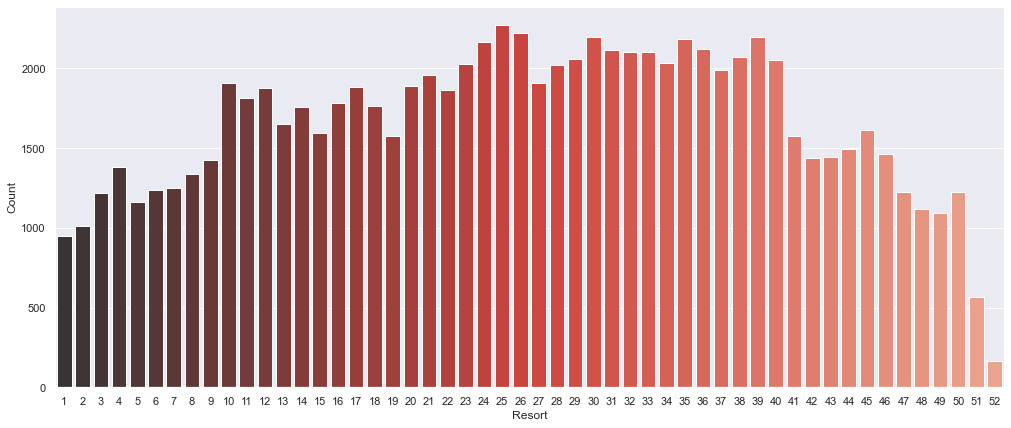

In [81]:
pyplot.figure(figsize=(17, 7))
ax = sns.countplot(data=EDA_df,
                   x='B_S_week_of_the_year' , palette="Reds_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

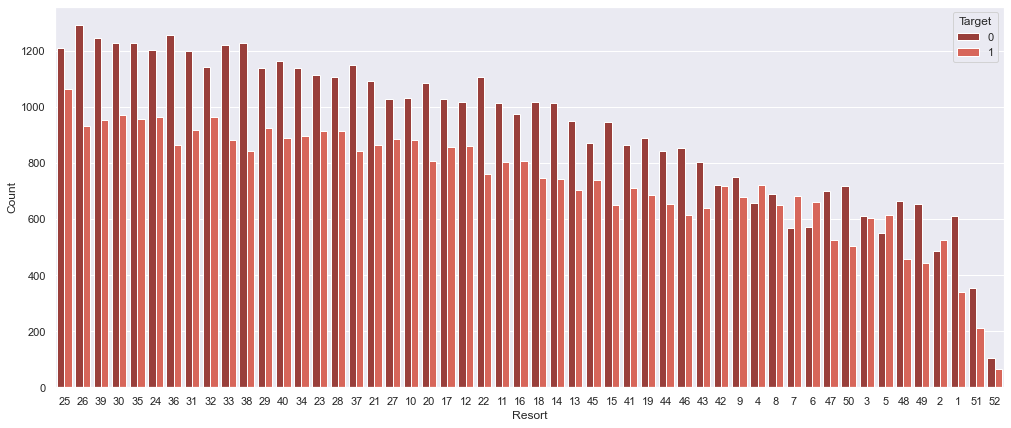

In [82]:
pyplot.figure(figsize=(17, 7))
ax = sns.countplot(data=EDA_df,
                   x='B_S_week_of_the_year',
                   order = EDA_df['B_S_week_of_the_year'].value_counts().index ,hue="Target", palette="Reds_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [83]:
### Exploring Scheduled Day Of the Month

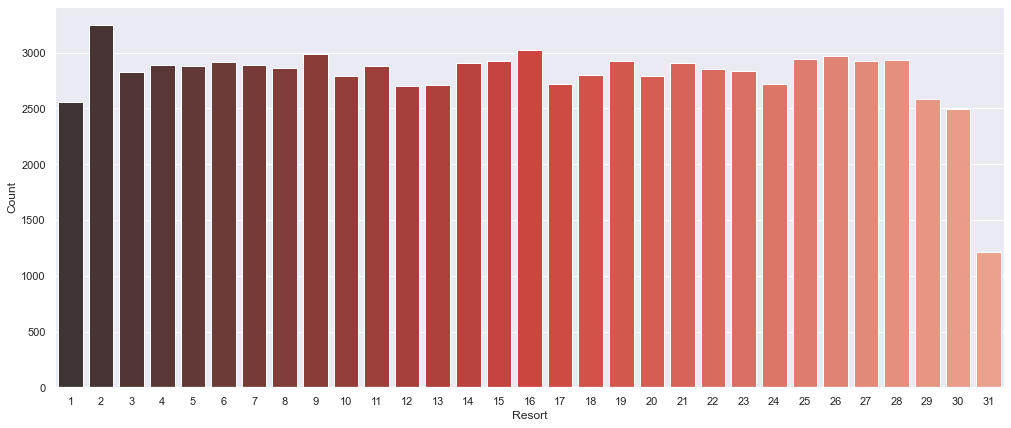

In [84]:
pyplot.figure(figsize=(17, 7))
ax = sns.countplot(data=EDA_df,
                   x='B_S_day_of_the_month', palette="Reds_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [85]:
### Exploring Scheduled Day Of the Week

In [86]:
EDA_df.ScheduledDayOfWeek.value_counts()

Saturday     30389
Sunday       23370
Friday       14131
Thursday     10813
Monday        7170
Wednesday      497
Tuesday        217
Name: ScheduledDayOfWeek, dtype: int64

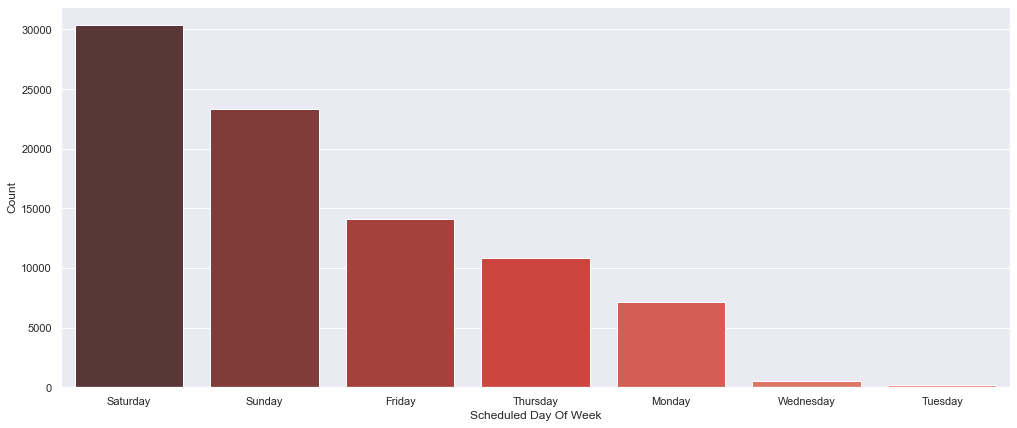

In [87]:
pyplot.figure(figsize=(17, 7))
ax = sns.countplot(data=EDA_df,
                   x='ScheduledDayOfWeek',
                   order = EDA_df['ScheduledDayOfWeek'].value_counts().index , palette="Reds_d")
ax.set(xlabel='Scheduled Day Of Week', ylabel='Count')
pyplot.show()

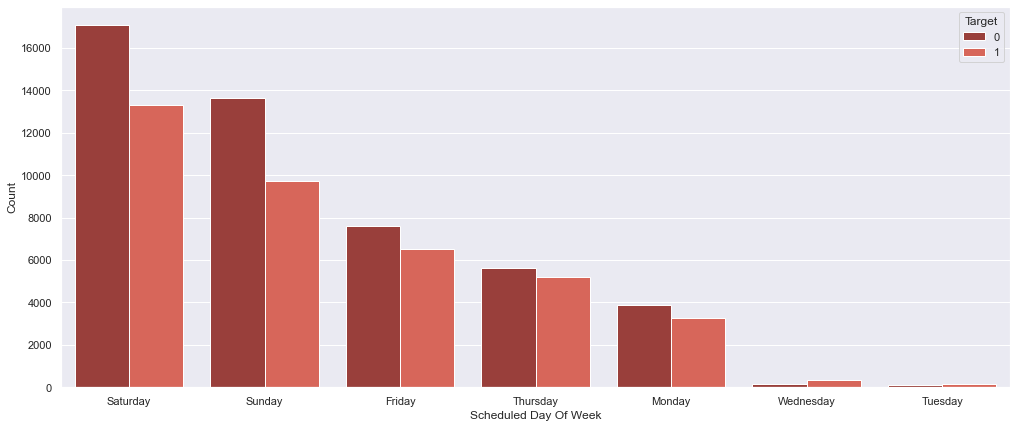

In [88]:
pyplot.figure(figsize=(17, 7))
ax = sns.countplot(data=EDA_df,
                   x='ScheduledDayOfWeek',
                   order = EDA_df['ScheduledDayOfWeek'].value_counts().index ,hue="Target", palette="Reds_d")
ax.set(xlabel='Scheduled Day Of Week', ylabel='Count')
pyplot.show()

In [89]:
### Exploring Tours

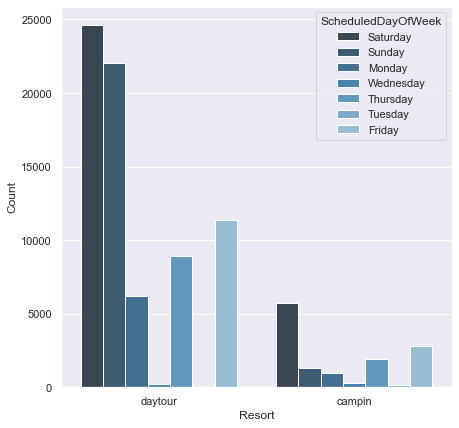

In [90]:
pyplot.figure(figsize=(7, 7))
ax = sns.countplot(data=EDA_df,
                   x='TourType',
                   order = EDA_df['TourType'].value_counts().index ,hue="ScheduledDayOfWeek", palette="Blues_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [91]:
### Exploring Booking Created

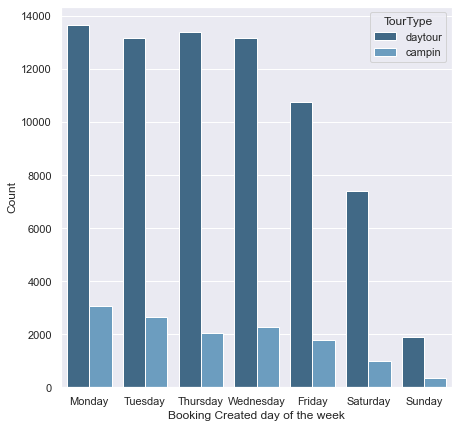

In [92]:
pyplot.figure(figsize=(7, 7))
ax = sns.countplot(data=EDA_df,
                   x='B_C_day_of_the_week',
                   order = EDA_df['B_C_day_of_the_week'].value_counts().index ,hue="TourType", palette="Blues_d")
ax.set(xlabel='Booking Created day of the week', ylabel='Count')
pyplot.show()

In [94]:
# pyplot.figure(figsize=(7, 7))
# ax = sns.countplot(data=EDA_df,
#                    x='B_C_day_of_the_week',
#                    order = EDA_df['B_C_day_of_the_week'].value_counts().index, hue='' , palette="Blues_d")
# ax.set(xlabel='Booking Created day of the week', ylabel='Count')
# pyplot.show()

In [ ]:
EDA_df.Encoded_Campaign

In [ ]:
cor_mat = EDA_df.loc[:,['Encoded_Campaign','Target']].corr()
f, ax = pyplot.subplots(figsize=(8,4))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

In [193]:
EDA_df.B_C_day_of_the_week.unique()

array(['Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [196]:
EDA_df.columns

Index(['ORDERID', 'OriginalOrderId', 'Program', 'Participant', 'Promotion',
       'Campaign', 'AgentName', 'Resort', 'TourType', 'Wave',
       'SecondConfirmDate', 'BookingCreatedDate', 'BookingScheduledDate',
       'BookingAge', 'BookingConfirmationAge', 'ScheduledDayOfWeek',
       'B_S_week_of_the_year', 'B_S_day_of_the_month', 'Target',
       'Encoded_Resort', 'BLR', 'LSR', 'NSL', 'RFR', 'TNC', 'TRG', 'TRO',
       'is_RVOwner', 'Encoded_TourType', 'campin', 'daytour',
       'Encoded_ScheduledDayOfWeek', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Encoded_IsRescheduledBooking',
       'Encoded_Campaign', 'B_C_day_of_the_week'],
      dtype='object')

       Monday  Tuesday  Wednesday  Thursday  Friday  Sunday  Saturday  Target
83242       0        0          0         0       0       1         0       0
55362       0        0          0         1       0       0         0       1
26791       0        0          0         0       0       1         0       0
76008       1        0          0         0       0       0         0       0
57575       0        0          0         0       1       0         0       0
79431       0        0          0         0       0       0         1       0
6251        0        0          0         1       0       0         0       0
36385       0        0          0         0       0       1         0       0
6698        0        0          0         0       0       0         1       1
81633       0        0          0         0       1       0         0       1


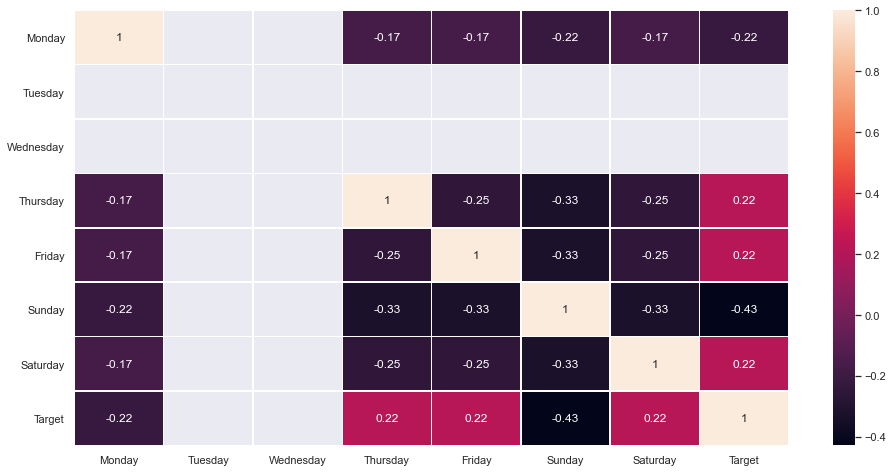

In [195]:
co_x =EDA_df.loc[:,[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday', 'Target']].sample(10)
print(co_x)
cor_mat = co_x.corr()
f, ax = pyplot.subplots(figsize=(16,8))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax)

## Explorations for Tours & No_Tour in Comparision

In [197]:
EDA_df.columns

Index(['ORDERID', 'OriginalOrderId', 'Program', 'Participant', 'Promotion',
       'Campaign', 'AgentName', 'Resort', 'TourType', 'Wave',
       'SecondConfirmDate', 'BookingCreatedDate', 'BookingScheduledDate',
       'BookingAge', 'BookingConfirmationAge', 'ScheduledDayOfWeek',
       'B_S_week_of_the_year', 'B_S_day_of_the_month', 'Target',
       'Encoded_Resort', 'BLR', 'LSR', 'NSL', 'RFR', 'TNC', 'TRG', 'TRO',
       'is_RVOwner', 'Encoded_TourType', 'campin', 'daytour',
       'Encoded_ScheduledDayOfWeek', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Encoded_IsRescheduledBooking',
       'Encoded_Campaign', 'B_C_day_of_the_week'],
      dtype='object')

In [1]:
LowRankAgents= EDA_df
pyplot.figure(figsize=(20, 70))
ax = sns.countplot(data=EDA_df,
                   y='AgentName',
                   order = EDA_df['AgentName'].value_counts().index[0:30], hue="isTour", palette="Greens_d")
ax.set(xlabel='Count', ylabel='AgentName')
pyplot.show()

NameError: name 'EDA_df' is not defined

In [198]:
tours_df = EDA_df.loc[EDA_df.Target == 1]
no_tours_df = EDA_df.loc[EDA_df.Target == 0]

In [199]:
print(len(tours_df))
print(len(no_tours_df))

38493
48094


In [200]:
tours_df.Campaign.value_counts()

VIC | All TRA Resorts | 21 Days Free Camping                                                       1000
Affiliate | Slicebread | 4 Days 3 Nights Free Camping                                               670
Affiliate | Seychelle | $1000 free camping + $50 Gift card                                          591
Affiliate | Marketing Informatics | 4 Days 3 Nights Free Camping                                    499
BPO | BPO - Ferris | $1000 FREE CAMPING                                                             322
                                                                                                   ... 
Regi Dealer | PA-LERCH RV | $1000 Free Camping                                                        1
MALL | NY-Arnot Game Stop - 3126 | 4 Days 3 Nights Camping                                            1
LIST-CW | #N/A | 4 Days 3 Nights Free Camping                                                         1
REGI-SHOW | NC-CHARLOTTE RV SHOW-ENTRANCE | 25K SWEEPS / $1000 F

In [ ]:
tours_df

In [201]:
tours_df.loc[tours_df.Campaign == 'VIC | All TRA Resorts | 21 Days Free Camping'].Encoded_Campaign.unique()

array([5704])

In [ ]:
no_tours_df.Campaign.value_counts()

In [ ]:
no_tours_df.loc[no_tours_df.Campaign == 'Affiliate | Slicebread | 4 Days 3 Nights Free Camping'].Encoded_Campaign.unique()

In [ ]:
pyplot.figure(figsize=(10, 30))
ax = sns.countplot(data=tours_df,
                   y='Campaign',
                   order = tours_df['Campaign'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Count', ylabel='Campaign')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 30))
ax = sns.countplot(data=tours_df.loc[tours_df.is_RVOwner == 1],
                   y='Program',
                   order = tours_df['Program'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Count', ylabel='Program')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 50))
ax = sns.countplot(data=tours_df.loc[tours_df.is_RVOwner == 0],
                   y='Program',
                   order = tours_df['Program'].value_counts().index, palette="Greens_d", hue="Resort")
ax.set(xlabel='Count', ylabel='Program')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 30))
ax = sns.countplot(data=no_tours_df.loc[no_tours_df.is_RVOwner == 1],
                   y='Program',
                   order = no_tours_df['Program'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Count', ylabel='Program')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 50))
ax = sns.countplot(data=tours_df.loc[tours_df.is_RVOwner == 1],
                   y='Promotion',
                   order = tours_df['Promotion'].value_counts().index, palette="Greens_d" )
ax.set(xlabel='Count', ylabel='Promotion')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 80))
ax = sns.countplot(data=tours_df.loc[tours_df.is_RVOwner == 1],
                   y='Promotion',
                   order = tours_df['Promotion'].value_counts().index, palette="Greens_d" ,hue='Resort')
ax.set(xlabel='Count', ylabel='Promotion')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 50))
ax = sns.countplot(data=no_tours_df,
                   y='Promotion',
                   order = no_tours_df['Promotion'].value_counts().index, palette="Greens_d" )
ax.set(xlabel='Count', ylabel='Promotion')
pyplot.show()

In [ ]:
pyplot.figure(figsize=(10, 120))
ax = sns.countplot(data=no_tours_df.loc[no_tours_df.is_RVOwner == 0],
                   y='Promotion',
                   order = no_tours_df['Promotion'].value_counts().index, palette="Greens_d" ,hue='Resort')
ax.set(xlabel='Count', ylabel='Promotion')
pyplot.show()

In [ ]:
## Tour VS No_Tour

In [ ]:
## Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=tours_df,
                   x='Resort',
                   order = tours_df['Resort'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [ ]:
## No Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=no_tours_df,
                   x='Resort',
                   order = no_tours_df['Resort'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [ ]:
### Wave

In [ ]:
## Tours by Wave
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=tours_df,
                   x='Wave',
                   order = tours_df['Wave'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Wave', ylabel='Count')
pyplot.show()

In [ ]:
## No Tours by Wave
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=no_tours_df,
                   x='Wave',
                   order = no_tours_df['Wave'].value_counts().index, palette="Greens_d")
ax.set(xlabel='Wave', ylabel='Count')
pyplot.show()

In [ ]:
## Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=no_tours_df,
                   x='Resort',
                   order = no_tours_df['Resort'].value_counts().index, palette="Greens_d", hue = 'Wave')
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [ ]:
## Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=tours_df,
                   x='Resort',
                   order = tours_df['Resort'].value_counts().index, palette="Greens_d", hue = 'Wave')
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [ ]:
## Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=tours_df,
                   x='Resort',
                   order = tours_df['Resort'].value_counts().index, palette="Blues_d", hue = 'TourType')
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [ ]:
## Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=no_tours_df,
                   x='Resort',
                   order = no_tours_df['Resort'].value_counts().index, palette="Blues_d", hue = 'TourType')
ax.set(xlabel='Resort', ylabel='Count')
pyplot.show()

In [ ]:
## Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=tours_df,
                   x='Wave',
                   order = tours_df['Wave'].value_counts().index, palette="Blues_d", hue = 'TourType')
ax.set(xlabel='TourType', ylabel='Count')
pyplot.show()

In [ ]:
## No Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=no_tours_df,
                   x='Wave',
                   order = no_tours_df['Wave'].value_counts().index, palette="Blues_d", hue = 'TourType')
ax.set(xlabel='TourType', ylabel='Count')
pyplot.show()

In [ ]:
tours_df.columns

In [ ]:
tours_df.Reserve_difference.value_counts()

In [ ]:
no_tours_df.Reserve_difference.value_counts()

In [ ]:
tours_df.Week_Number.value_counts()

In [ ]:
no_tours_df.Week_Number.value_counts()

In [ ]:
tours_df.BookingAge.value_counts()

In [ ]:
# cor_mat = tours_df.loc[tours_df.is_RVOwner == 1,['BLR', 'LSR', 'NSL', 'RFR', 'TNC','TRG', 'TRO','Wave','WeekNumber']].corr()
# f, ax = pyplot.subplots(figsize=(16,8))
# sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

In [ ]:
tours_df.ScheduledDayOfWeek

In [ ]:
cor_mat = tours_df.loc[:,['BLR', 'LSR', 'NSL', 'RFR', 'TNC','TRG', 'TRO','WeekNumber_0', 'WeekNumber_1',
                          'WeekNumber_2','WeekNumber_3', 'WeekNumber_4', 'WeekNumber_5', 'WeekNumber_6',
                          'is_RVOwner']].sample(100).corr()
f, ax = pyplot.subplots(figsize=(16,8))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

In [ ]:
cor_mat = no_tours_df.loc[:,['BLR', 'LSR', 'NSL', 'RFR', 'TNC','TRG', 'TRO','WeekNumber_0', 'WeekNumber_1',
                          'WeekNumber_2','WeekNumber_3', 'WeekNumber_4', 'WeekNumber_5', 'WeekNumber_6',
                          'is_RVOwner']].sample(1000).corr()
f, ax = pyplot.subplots(figsize=(16,8))
sns.heatmap(cor_mat,linewidths=.5, annot=True, ax=ax);

In [ ]:
## No Tours by Resorts
pyplot.figure(figsize=(10, 6))
ax = sns.countplot(data=no_tours_df,
                   x='WeekNumber',
                   order = no_tours_df['WeekNumber'].value_counts().index, palette="Blues_d", hue = 'LSR')
ax.set(xlabel='WeekNumber', ylabel='Count')
pyplot.show()

In [ ]:
sns.pairplot(EDA_df[['is_RVOwner','BookingAge','Target']], hue="Target", size=2, diag_kind="kde");